In [ ]:
import numpy as onp
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

# plot functions
import matplotlib.pyplot as plt
plt.style.use(['seaborn-paper'])

In [ ]:
#@title Data

rng_key = random.PRNGKey(10)

n_samples, n_features = 100, 1

# generate X
X = random.normal(rng_key, shape=(n_samples, n_features))
X_plot = jnp.linspace(X.min(), X.max(), 100)[:, None]

# generate true w
true_w = random.normal(rng_key+1, shape=(n_features, 1))
print("True Weights: ", true_w)
# generate y = Xw + eps
eps = 0.1
y_true = jnp.dot(X, true_w) + eps * random.normal(rng_key+2, shape=(n_samples, 1))


def plot_results():

    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(X, y_true)
    plt.show()

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


True Weights:  [[1.1355436]]


## Theory - Kernel Functions

### Euclidean Distances

In [ ]:
def sqeuclidean_distances(x, y):

    return jnp.sum( (x - y) ** 2)


def linear_kernel(x, y):
    return jnp.inner(x, y)


def polynomial_kernel(params, x, y):
    return jnp.power(params['alpha'] * np.inner(x, y)), params['degree']

def sigmoid_kernel(params, x, y):
    return jnp.tanh(params['alpha'], np.inner(x, y) + c)

def rbf_kernel(params, x, y):
    """The RBF Kernel"""
    # calculate the kernel
    return jnp.exp(- params['gamma'] * (sqeuclidean_distances(x, y)) )

def ard_kernel(params, x, y):
    """The RBF Kernel"""
    
    # scale the data
    x = jnp.divide(x, params['length_scale'])
    y = jnp.divide(y, params['length_scale'])

    # calculate the kernel
    return jnp.exp(- (sqeuclidean_distances(x, y)) )

def gram(kernel_func, params, X, Y=None):
    if Y is None:
        return vmap(lambda x: vmap(lambda y: kernel_func(params, x, y))(X))(X)
    else:
        return vmap(lambda x: vmap(lambda y: kernel_func(params, x, y))(Y))(X)


In [ ]:
rng_key = random.PRNGKey(10)

n_samples, n_features = 100, 1

In [ ]:
#@title Testing - Euclidean Distances

from sklearn.metrics.pairwise import euclidean_distances

def test_euclidean_distance_mat():

    rng_key = random.PRNGKey(10)

    # generate X
    X = random.normal(rng_key, shape=(100, 2))

    # sklearn - euclidean distances
    dist_sk = euclidean_distances(onp.array(X), onp.array(X), squared=True)

    # jax - 
    dist_jax = gram(sqeuclidean_distances, X, X)

    onp.testing.assert_array_almost_equal(
        dist_sk, 
        onp.array(dist_jax), 
        decimal=1e-5
    )

def test_euclidean_distance_mat_single():

    rng_key = random.PRNGKey(10)

    # generate X
    X = random.normal(rng_key, shape=(100, 2))

    # sklearn - euclidean distances
    dist_sk = euclidean_distances(onp.array(X), onp.array(X), squared=True)

    # jax - 
    dist_jax = gram(sqeuclidean_distances, X)

    onp.testing.assert_array_almost_equal(
        dist_sk, 
        onp.array(dist_jax), 
        decimal=1e-5
    )

test_euclidean_distance_mat()
test_euclidean_distance_mat_single()

TypeError: ignored

### RBF Kernel Matrix

In [ ]:
#@title Testing RBF Kernel

from functools import partial
from sklearn.metrics.pairwise import rbf_kernel as rbf_sklearn

def test_rbf_mat():

    rng_key = random.PRNGKey(10)

    # generate X
    X = random.normal(rng_key, shape=(100, 2))

    # sklearn - euclidean distances
    rbf_sk = rbf_sklearn(onp.array(X), onp.array(X), gamma=1.0)

    # jax - 
    params = {'gamma': 1.0}

    rbf_func = partial(rbf_kernel, params)
    rbf_jax = gram(rbf_func, X, X)

    onp.testing.assert_array_almost_equal(rbf_sk, onp.array(rbf_jax), decimal=1e-5)

def test_rbf_mat_single():

    rng_key = random.PRNGKey(10)

    # generate X
    X = random.normal(rng_key, shape=(100, 2))

    # sklearn - euclidean distances
    rbf_sk = rbf_sklearn(onp.array(X), None, gamma=1.0)

    # jax - 
    params = {'gamma': 1.0}

    rbf_func = partial(rbf_kernel, params)
    rbf_jax = gram(rbf_func, X, None)

    onp.testing.assert_array_almost_equal(rbf_sk, onp.array(rbf_jax), decimal=1e-5)


test_rbf_mat()
test_rbf_mat_single()

TypeError: ignored

In [ ]:
from functools import partial
from sklearn.metrics.pairwise import rbf_kernel as rbf_sklearn

In [ ]:
params = {'gamma': 1.0}

rbf_func = partial(gram, rbf_kernel)
rbf_jax = rbf_func(params, X[0, :], X[0, :])
print(rbf_jax.shape)

rbf_jax = rbf_func(params, X, X)
print(rbf_jax.shape)

(1, 1)
(100, 100)


## Kernel Derivatives

## KRR Model


**Solve the Cholesky decomposition**

$$L = \text{cholesky}(K + \alpha \mathbf{I}_N)$$

**Solve for the weights**

$$\mathbf{w} = L^\top $$

In [ ]:
# calculate kernel matrix K(x,x)
rbf_func = partial(gram, rbf_kernel)
K = rbf_func(params, x, x)

# cho factor the cholesky 
L, lower = jscio.linalg.cho_factor(K)


# weights
weights = jscio.linalg.cho_solve((L, lower), y)

# return the predictions
y_linalg jnp.dot(weights, x)

NameError: ignored

In [ ]:
from jax import scipy as jscio

def init_params():
    return {
        'gamma': 1.0
    }

# def rbf_func

def model(params, x, y):

    alpha = 0.01

    # calculate kernel matrix K(x,x)
    rbf_func = partial(gram, rbf_kernel)
    K = rbf_func(params, x, x)

    # cho factor the cholesky 
    L, lower = jscio.linalg.cho_factor(K)

    # weights
    weights = jscio.linalg.cho_solve((L, lower), y)

    # save the params


    # return the predictions
    return jnp.dot(weights, x)

def model_pred(params, X, X_new):

    # calculate kernel matrix K_x
    rbf_func = partial(gram, rbf_kernel)
    K = rbf_func(params, X, x_new)

    return np.sum(params['weights'] * K)



In [ ]:
X.shape, y_true.shape

((100, 1), (100, 1))

#### Single Dimensions

In [ ]:
# predictions (single dimensions)
ypred = model(init_params(), X[0, :], y_true[0, :])
print("Predictions:", ypred)



# vectorized inputs
model_vectorized = jax.vmap(model, in_axes=(None, 0, 0))
vypred = model_vectorized(init_params(), X, y_true)
print("Predictions (vectorized):", vypred.shape)


Predictions: 0.052236356
Predictions (vectorized): (100,)


#### Batch Dimensions

Predictions (vectorized): (100,)
Loss (vectorized): 3.5969203
dLoss (vectorized): {'gamma': DeviceArray([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
             -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
              0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
             -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
              0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,
              0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,
             -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,
              0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
             -0.,  0., -0.,  0.], dtype=float32)}


In [ ]:
vloss = loss(params, X[0, :], y_true[0, :])

(1,) (1,)
(1,) (1,) (1, 1)
0.052236356


In [ ]:
vloss = vmap(loss, in_axes=(None, 0, 0))(params, X, y_true)
print(jnp.mean(vloss))

(1,) (1,)
(1,) (1,) (1, 1)
Traced<ShapedArray(float32[])>with<BatchTrace(level=1/0)>
3.5969203


## Training - Stochastic Gradient Descent

In [ ]:
def init_params(rng, X):
    return {
        'gamma': 1.0,
        'weights': random.normal(rng, shape=(X.shape[0],)),
        'lambda': 0.1,
    }

# def rbf_func

def model(params, x, y):

    alpha = 0.01

    # calculate kernel matrix K(x,x)
    rbf_func = partial(gram, rbf_kernel)
    K = rbf_func(params, x, x) + params['lambda']

    # return the predictions
    return jnp.sum(params['weights'] * K)

def loss(params, x, y):
    # print(x.shape, y.shape)
    out = model(params, x, y)
    # print(out)
    mse_loss = jnp.mean((out - y) ** 2)
    return mse_loss

#### Single Feature

In [ ]:
t = random.normal(rng_key, shape=(1, ))

In [ ]:
rng_key = random.PRNGKey(10)

params = init_params(rng_key, X)

# predictions
ypred = model(params, X[0, :], y_true[0, :])
print("Predictions:", ypred)

# MSE loss
iloss = loss(params, X[0, :], y_true[0, :])
print("Loss:", iloss)

# Gradient of MSE Loss
loss_grad = jax.grad(loss)

df_p = loss_grad(params, X[0, :], y_true[0, :])
print("dLoss:", df_p)

Predictions: 4.767791
Loss: 20.715712
dLoss: {'gamma': DeviceArray(-0., dtype=float32), 'lambda': DeviceArray(42.971043, dtype=float32), 'weights': DeviceArray([9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.193933, 9.193933, 9.193933,
             9.193933, 9.193933, 9.193933, 9.1939

#### Batched Dimensions

In [ ]:
model_vectorized = jax.vmap(model, in_axes=(None, 0, 0))
ypred_batch = model_vectorized(params, X, y_true)
model_vectorized_jitted = jax.jit(jax.vmap(model, in_axes=(None, 0, 0)))
ypred_batch = model_vectorized_jitted(params, X, y_true)

In [ ]:
%timeit _ = model_vectorized(params, X, y_true)
%timeit _ = model_vectorized_jitted(params, X, y_true)

100 loops, best of 3: 7.58 ms per loop
1000 loops, best of 3: 362 µs per loop


In [ ]:
# vectorized inputs
model_vectorized = jax.jit(jax.vmap(model, in_axes=(None, 0, 0)))
ypred_batch = model_vectorized(params, X, y_true)
print("Predictions (vectorized):", vypred.shape)


# vectorized loss function
loss_batch = jax.jit(jax.vmap(loss, in_axes=(None, 0, 0)))

iloss = loss_batch(params, X, y_true)
print("Loss (vectorized):", jnp.mean(iloss))

# vectorized grad of loss function
loss_grad = jax.grad(loss)

dloss_vec = jax.jit(jax.vmap(loss_grad, in_axes=(None, 0, 0)))

params_grad = dloss_vec(params, X, y_true)
print("dLoss (vectorized):", jnp.mean(params_grad['gamma']), jnp.mean(params_grad['weights']))

# plt.scatter(X, ypred)

Predictions (vectorized): (100,)
Loss (vectorized): 5.7651696
dLoss (vectorized): 0.0 -4.646677


In [ ]:
import tqdm

In [ ]:
grad_params = dloss_batch(params, X, y_true)

In [ ]:
grad_params['gamma'].shape, grad_params['lambda'].shape, grad_params['weights'].shape

((100,), (100,), (100, 1))

#### Gradients (w.r.t. parameters)

In [ ]:
# vectorized loss function
loss_batch = jax.jit(jax.vmap(loss, in_axes=(None, 0, 0)))

# vectorized grad function
dloss_batch = jax.jit(vmap(jax.grad(loss), in_axes=(None, 0, 0), out_axes=0))

# stochastic gradient descent 
learning_rate = 0.1
epochs = 100
losses = list()
rng_key = random.PRNGKey(10)

# initialize parameters
params = init_params(rng_key, X)

# loop through epochs
for iteration in tqdm.trange(epochs):
    
    # get the gradient of the loss 
    grad_params = dloss_batch(params, X, y_true)

    # update the parameters
    # for name, value in grad_params.items():
    #     params[name] = params[name] - learning_rate * jnp.mean(value, axis=0)
    # Update weight params
    params['weights'] = params['weights'] - learning_rate * jnp.mean(params['weights'], axis=0)
    # append loss
    losses.append(jnp.mean(loss_batch(params, X, y_true)))

100%|██████████| 100/100 [00:00<00:00, 118.50it/s]


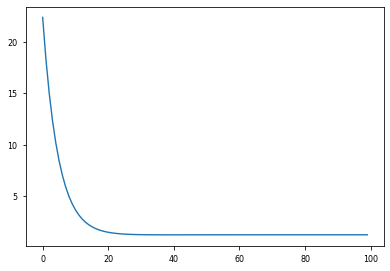

In [ ]:
plt.plot(losses)

In [ ]:
params

{'gamma': 1.0,
 'lambda': 0.1,
 'weights': DeviceArray([ 0.19425136,  1.0938073 ,  0.85544115,  0.953693  ,
               0.22675167,  1.8651866 ,  0.50394714, -0.4338469 ,
               0.257066  , -1.7467734 , -1.7789768 , -0.91150916,
               0.20680225, -1.137041  , -1.0277678 ,  1.1267673 ,
               0.87235814, -1.1441122 ,  0.47536778, -1.1345023 ,
              -0.9744479 ,  0.41705033, -0.56725675,  0.6767472 ,
              -1.8781873 ,  0.63653666,  0.33439958, -0.7229592 ,
              -1.2604877 ,  0.21942863, -0.94913477,  0.10413856,
               0.9814983 ,  1.9945854 ,  1.047774  , -0.38706928,
               0.22795689,  1.1900183 ,  0.2866312 ,  0.57188874,
              -0.38932133,  1.1387252 , -0.23779728, -1.5292493 ,
              -1.1651725 , -1.8413118 , -1.7673725 ,  0.28281206,
              -0.0773918 , -1.2464343 , -0.28798968,  1.4319695 ,
               0.42960766,  1.2455593 ,  0.7963638 , -0.5912133 ,
               0.8013777 , -2.1300

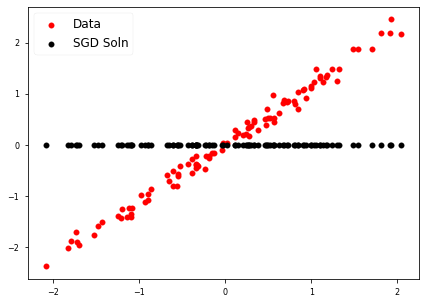

In [ ]:
# evaluate linear model
ypred = vmap(model, in_axes=(None, 0,0))(params, X, y_true)

# Plot Results
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y_true, label='Data', color='red')
ax.scatter(X, ypred, label='SGD Soln', color='black')
ax.legend(fontsize=12)
plt.show()

### Predictions - New Data

In [ ]:

def model_pred(params, X, X_new):
    # calculate kernel matrix K_x
    K_x = jax.vmap(lambda x_: rbf_kernel(params, X_new, x_))(X)
    # K = rbf_func(params, X, X_new)

    y = jnp.sum(K_x * params['weights'])
    return y

In [ ]:
print('Inputs:', X.shape, X_plot[0,:].shape)
ypred = model_pred(params, X, X_plot[0, :])
print("Outputs (shape):", ypred.shape)

# # vectorized model
model_pred_vectorized = jax.vmap(model_pred, in_axes=(None, None, 0), out_axes=0)

print('Inputs:', X.shape, X_plot.shape)
ypred_v = model_pred_vectorized(params, X, X)
print("Outputs (shape):", ypred_v.shape)

Inputs: (100, 1) (1,)
Outputs (shape): ()
Inputs: (100, 1) (100, 1)
Outputs (shape): (100,)


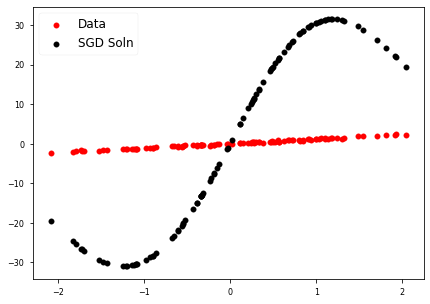

In [ ]:
# Plot Results
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y_true, label='Data', color='red')
ax.scatter(X, ypred_v, label='SGD Soln', color='black')
ax.legend(fontsize=12)
plt.show()

In [ ]:
x_train = X
x_test = X_plot[0, :]
K_x = jax.vmap(lambda x_: rbf_kernel(params, x_test, x_))(x_train)
print(K_x.shape)

prods = jnp.sum(params['weights'] * K_x)
print(prods.shape)

(100,)
()


In [ ]:
def model(params, x, y):

    alpha = 0.01

    # calculate kernel matrix K(x,x)
    rbf_func = partial(gram, rbf_kernel)
    K = rbf_func(params, x, x)

    # cho factor the cholesky 
    L, lower = jscio.linalg.cho_factor(K)

    # weights
    params['weights'] = jscio.linalg.cho_solve((L, lower), y)

    # return the predictions
    return jnp.dot(params['weights'], x), 

In [ ]:
params

{'gamma': DeviceArray(1., dtype=float32)}

In [ ]:
# making predictions

# define kernel function
rbf_func = partial(rbf_kernel, params)
print(X.shape, X_plot.shape)
# calculate kernel matrix K_x
K_x = gram(rbf_func, X, X_plot)
print(K_x.shape)

# calculate weights



(100, 1) (100, 1)


TypeError: ignored

## Kernel Derivatives

In [ ]:
# derivative of rbf kernel
dK_function = jax.grad(rbf_kernel, argnums=(2))

output = dK_function(params, X[0, :], X_plot[0, :])
print(output)
# derivative of gram matrix
rbf_func = partial(rbf_kernel, params)
gram_func = partial(gram, rbf_func)
dK_gram = jax.jacfwd(gram_func, argnums=(1))(X, X)
print(dK_gram.shape)

[0.02094684]
(100, 100, 100, 1)


## Theory

### Linear Regression
Regression is a form of curve fitting or function approximation. Regression models typically try to solve the following problem: We want to find some latent function $f(\cdot)$ s.t.

$$\hat{y}=f(\mathbf{x,w}) + \epsilon_y$$

where:
* $\mathbf{w}$ - weights, unknown parameters (`n_features`)
* $\mathbf{x}$ - are independent variables (`n_features`)
    * $\mathbf{X}$ - are independent variables stacked with samples/realizations (`n_samples, n_features`)
* $\mathbf{y}$ - are dependent variables (`n_targets`)
    * $\mathbf{Y}$ - are dependent variables stacked on top of each other (`n_samples, n_targets`)

We hope to approximate $m$- dimensional continuous functions via said $f(\cdot)$. So if $\mathbf{x} \in \mathbb{R}^{D}$, we want the function to map from to the target space $\mathbf{y} \in \mathbb{R}^{P}$. 


**How do we choose the weights?**

We can use **cross-validation** or we can **minimize a cost function** either by gradient descent or exact solutions.



In [ ]:
#@title Linear Model

# Linear Model
def linear_model(params, x):
    """"""
    return jnp.dot(params['w'], x) #+ params['b']


### Exact Solution

Firstly, we can solve this explicitly in closed-form:

$$\hat{\mathbf{w}} = (X^\top X)^{-1}X^\top\mathbf{y}$$

Fortunately, the jax library has a `np.linalg.pinv` implementation that allows us to calculate the gradients.

Weights:  [1.131204]


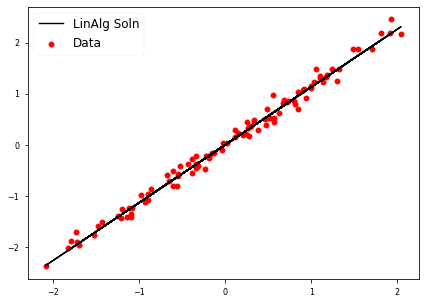

In [ ]:
# closed-form solution
w_linalg = jnp.dot(jnp.linalg.pinv(X), y_true)
print('Weights: ', w_linalg)

# add parameters to the weights
params = {'w': w_linalg, 'b': 0.0}

# create linear model
model = linear_model

# vectorize the model, w.r.t. inputs
model = vmap(model, in_axes=(None, 0))

# evaluate linear model
y_linalg = model(params, X)

# Plot Results
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y_true, label='Data', color='red')
ax.plot(X, y_linalg, label='LinAlg Soln', color='black')
ax.legend(fontsize=12)
plt.show()

In [ ]:
# get gradient of model w.r.t. inputs (NOT params)
model_gradx = jax.grad(linear_model, argnums=(1))

# vectorize grad function
model_gradx = vmap(model_gradx, in_axes=(None, 0))

# get gradients w.r.t X
dydx = model_gradx(params, X)
print(jnp.mean(dydx))

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(X, dydx, label='Gradient', color='red')
ax.plot(X, y_linalg, label='LinAlg Soln', color='black')
ax.legend(fontsize=12)
plt.show()

### Gradient Descent


We can also use gradient descent to tackle this problem. If we initialize $\mathbf{w}_0$ to be something random, then we can update:

$$\mathbf{w}_j = \mathbf{w}_{j-1} + \alpha \nabla \mathcal{L}(\mathbf{w}_{j-1})$$

where $\nabla$ is the gradient operator and $\alpha$ is the learning rate.

In [ ]:
# initialize params
def init_params(x):
    return {'w': jnp.zeros(jnp.shape(x))}

params = init_params(X[0, :])
print(params)

{'w': DeviceArray([0.], dtype=float32)}


### Loss Function

Recall the model for simple:

$$y = X\mathbf{w}$$

We can define a loss function to describe the penalization:

$$\mathcal{L}(\mathbf{w}) 
= \left( f(\mathbf{w,x}) - y \right)^2$$

where $\mathbf{x,w} \in \mathbb{R}^D$ and $\mathbf{y} \in \mathbb{R}^P$

In [ ]:
from typing import Callable, Dict
# MSE Loss Function
def squared_loss(
    params: Dict,
    func: Callable,
    x,
    y):
    """calculates the squared loss"""
    # output of model
    out = func(params, x)

    # calculate the squared loss
    return  jnp.sum(jnp.power(out - y, 2))

In [ ]:
# initialize loss function, squared loss
loss = mse_loss

# test loss function, single sample x
iloss = loss(params, linear_model, X[0, :], y_true)

print(iloss, type(iloss))

#### Vectorizing

In the above equation, we assumed that we only had one sample $\mathbf{x}$ of dimension D. What you'll typically see in your textbooks is the following: 


$$\mathcal{L}(\mathbf{w}) 
= \frac{1}{N}\sum_{i=1}^N\left( f(\mathbf{w,x_i}) - y_i \right)^2$$

where $N$ is the number of samples, $\mathbf{X} \in \mathbb{R}^{N \times D}$, $\mathbf{w} \in \mathbb{R}^D$ and $\mathbf{y} \in \mathbb{R}^P$

In JAX, we can vectorize this operation via the `vmap` function again so that we can deal with multiple samples.

In [ ]:
# initialize loss function, squared loss
loss = mse_loss

# vectorize loss function, w.r.t. inputs
loss = vmap(loss, in_axes=(None, None, 0, None), out_axes=0)

# test loss function, w.r.t. multiple inputs
nloss = loss(params, linear_model, X, y_true)

# mean squared loss
print(jnp.mean(nloss))

121.402695


### Loss Gradient

In [ ]:
# create grad function from loss
grad_loss = grad(mse_loss, argnums=(0))

In [ ]:
# do gradient descent
losses = []
epsilon = 0.1
iterations = 100

for _ in range(iterations):
    
    losses.append(loss(params, linear_model, X, y_true))
    # w_grad = w_grad - epsilon * grad_loss(w_grad)
    break

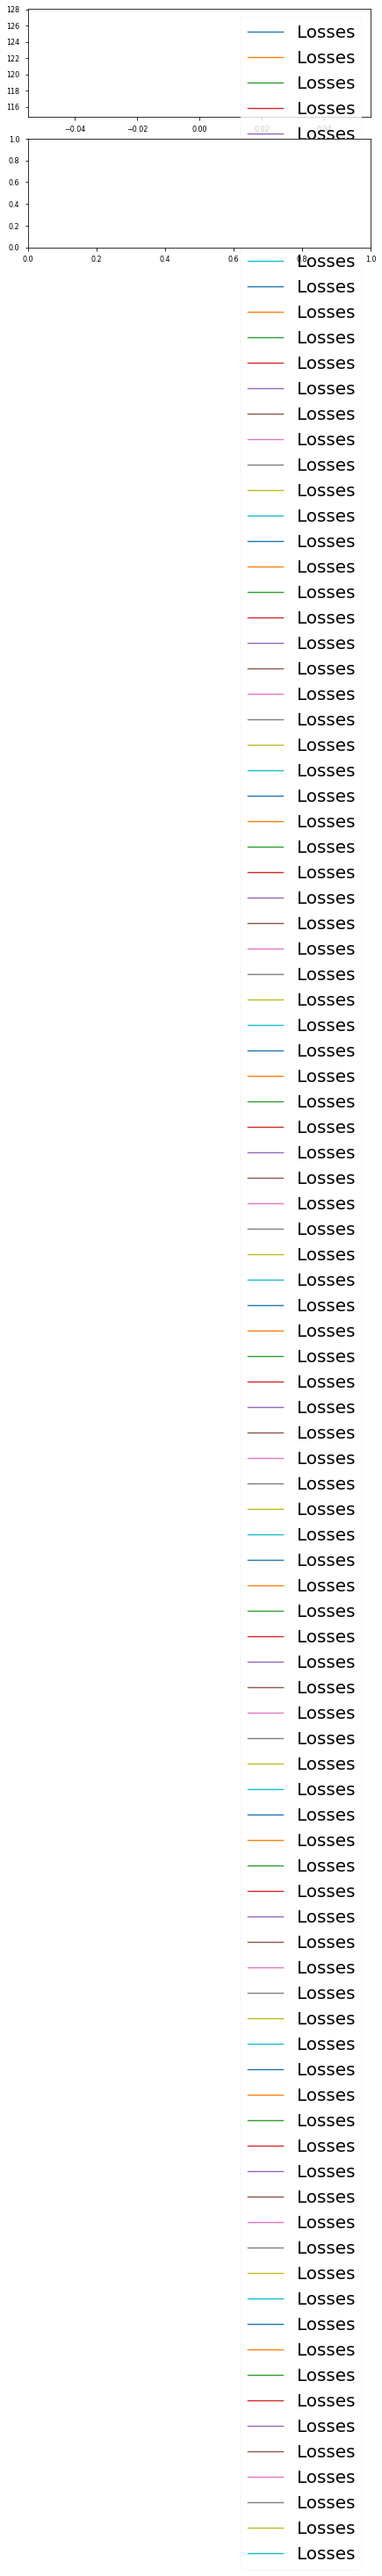

In [ ]:


fig, ax = plt.subplots(nrows=2, figsize=(7, 5))

# plot the losses
ax[0].plot(losses, label='Losses')
ax[0].legend(fontsize=20)

# # plot the resulting line
# y_pred = linear_model(X)

# ax[1].scatter(X, y_true, label='Data', color='red')
# ax[1].plot(X, y_pred, label='Grad Soln', color='black')
# ax[1].legend(fontsize=20)

plt.show()



### Penalized Linear Regression: Ridge Regression

For kernel methods, we add a penalty to the loss function.

$$
\mathcal{L}(\mathbf{w, \lambda}) 
= \underset{\mathbf{w}}{\text{min}}
\left\{ 
    ||\mathbf{Y}-\mathbf{Xw} ||^2 + \lambda ||\mathbf{w}||^2 
\right\}
$$
